In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [3]:
data = pd.read_csv('sleep_tracker.csv').dropna()

#data2 = data.copy()
#data2['total sleep time'] = data2['total sleep time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data['naps taken in preceding day'] = data['naps taken in preceding day'].apply(lambda x: 'no' if x == 0 else 'yes')

data['length of nap(s)'] = data['length of nap(s)'].str.replace(' min', '')
data['length of nap(s)'] = data['length of nap(s)'].astype(int)
data['quality of sleep'] = data['quality of sleep'].astype(int)

data = data.rename(columns={'total sleep time': 'total_sleep_time', 'length of nap(s)': 'length of nap(s) (min)', 'naps taken in preceding day': 'Naps Taken?'})
data.head()

,date (night of),location,sleep partner?,time to bed,time u woke up,total_sleep_time,quality of sleep,woke up?,remember dream?,Naps Taken?,length of nap(s) (min),infirmities
0,2/2/23,dorm,yes,12:05:00 AM,7:00:00 AM,6:55:00,2,yes,no,no,0,none
1,2/3/23,dorm,no,1:00:00 AM,9:36:00 AM,8:36:00,4,no,no,yes,10,none
2,2/4/23,dorm,no,12:30:00 AM,9:30:00 AM,9:00:00,3,no,no,no,0,none
3,2/5/23,dorm,no,1:00:00 AM,7:00:00 AM,6:00:00,4,no,no,no,0,none
4,2/6/23,dorm,yes,1:00:00 AM,9:30:00 AM,8:30:00,3,yes,no,no,0,none


In [4]:
df = pd.DataFrame(columns=['hours','minutes', 'seconds'])
df[['hours','minutes', 'seconds']] = (data['total_sleep_time']).str.split(':', expand = True)
df_sorted = df.sort_values(by='hours', key=lambda x: pd.to_numeric(x, errors='coerce'), ascending = True)
df.head(2)

,hours,minutes,seconds
0,6,55,00
1,8,36,00


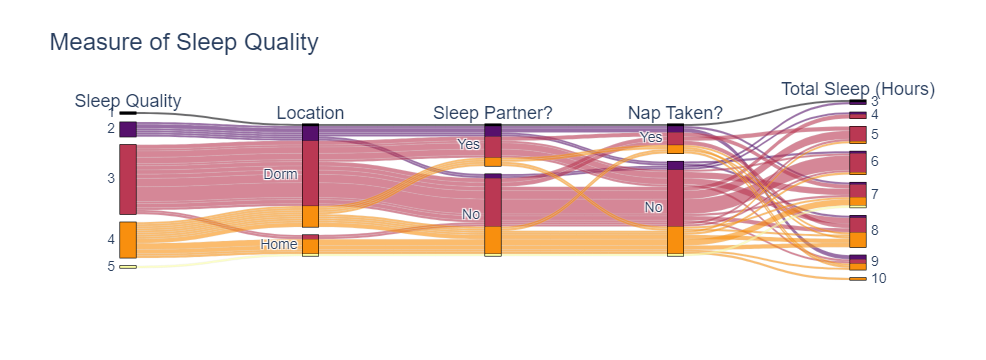

In [6]:
location_dim = go.parcats.Dimension(
    values = data['location'],
    categoryorder = 'array',
    categoryarray = ['dorm','home'],
    ticktext = ['Dorm', 'Home'],
    label = "Location"
)

sleep_partner_dim = go.parcats.Dimension(
    values = data['sleep partner?'],
    categoryorder = 'array',
    categoryarray = ['yes','no'],
    ticktext = ['Yes', 'No'],
    label = "Sleep Partner?"
)

woke_up_dim = go.parcats.Dimension(
    values = data['woke up?'],
    categoryorder = 'array',
    categoryarray =  ['yes','no'],
    ticktext = ['Yes', 'No'],
    label = "Sleep Interrupted?"
)

naps_dim = go.parcats.Dimension(
    values = data['Naps Taken?'],
    categoryorder = 'array',
    categoryarray =  ['yes','no'],
    ticktext = ['Yes', 'No'],
    label = "Nap Taken?"
)

sleep_quality_dim = go.parcats.Dimension(
    values = data['quality of sleep'],
    categoryorder = 'array',
    categoryarray =  [i for i in range(1,6)],
    #ticktext = ['Yes', 'No'],
    label = "Sleep Quality"
)

sleep_time_dim = go.parcats.Dimension(
    values = df['hours'],
    categoryorder = 'array',
    categoryarray =  [i for i in range(3,11)],
    #ticktext = ['Yes', 'No'],
    label = "Total Sleep (Hours)"
)

color = data['quality of sleep']
#colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions = [sleep_quality_dim, location_dim, sleep_partner_dim, naps_dim, sleep_time_dim],
                                  line = {'color': color, 'colorscale': 'Inferno', 'shape': 'hspline'},
                                  hoverinfo = 'count+probability',
                                  labelfont = {'size':18, 'family':'Arial'},
                                  tickfont = {'size':14, 'family':'Arial'})])
fig.update_layout(title = {'text':'Measure of Sleep Quality',
                          'font': {'family': 'Arial', 'size': 24}})

fig.write_html('sleep_parallel_cats.html')
fig.write_image("sleep_parallel_cats.png")
fig.show()

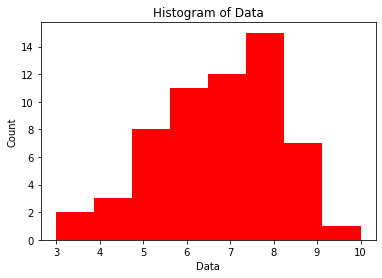

In [263]:

plt.hist(df_sorted['hours'], bins=8, color='red')

# Add labels and title to the plot
plt.xlabel('Data')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()